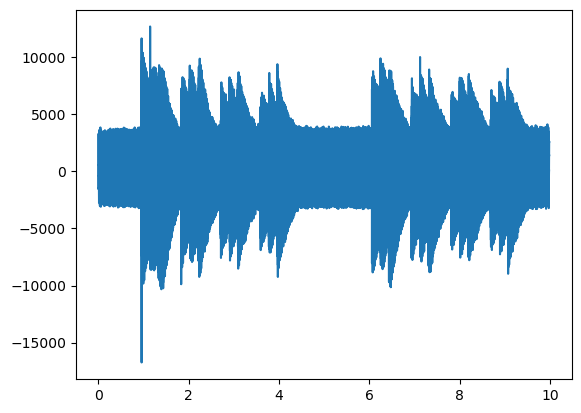

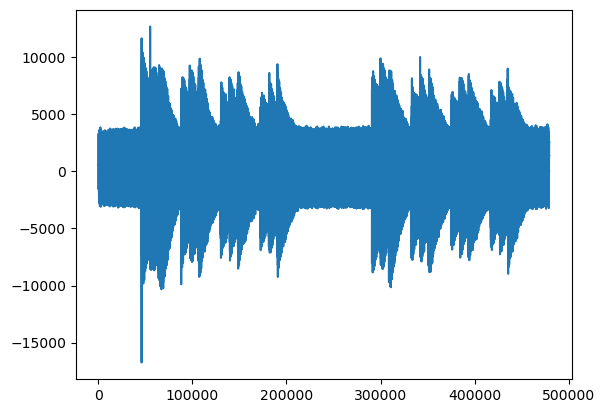

In [30]:
import wave
import numpy as np
import matplotlib.pyplot as plt
 
file_name = "output.wav" # 録音ファイル
RATE = 48000 # 録音時に設定したRATE

wf = wave.open(file_name, "rb")
data = np.frombuffer(wf.readframes(wf.getnframes()), dtype='int16')
wf.close()

x = np.arange(data.shape[0]) / RATE
plt.plot(x, data)
plt.show() # 横軸:時間(sec)
x = [i for i in range(len(data))]
plt.plot(x, data)
plt.show() # 横軸:データ点インデックス


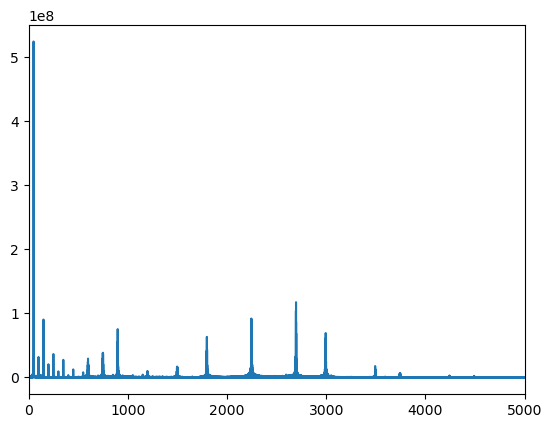

In [3]:
import wave
import numpy as np
import matplotlib.pyplot as plt
 
file_name = "output.wav" # 録音ファイル
RATE = 48000 # 録音時に設定したRATE

wf = wave.open(file_name, "rb")
data = np.frombuffer(wf.readframes(wf.getnframes()), dtype='int16')
wf.close()

fft_data = np.abs(np.fft.fft(data))    #FFTした信号の強度
freqList = np.fft.fftfreq(data.shape[0], d=1.0/RATE)    #周波数（グラフの横軸）の取得
plt.plot(freqList, fft_data)
plt.xlim(0, 5000)    #0～5000Hzまでとりあえず表示する
plt.show()


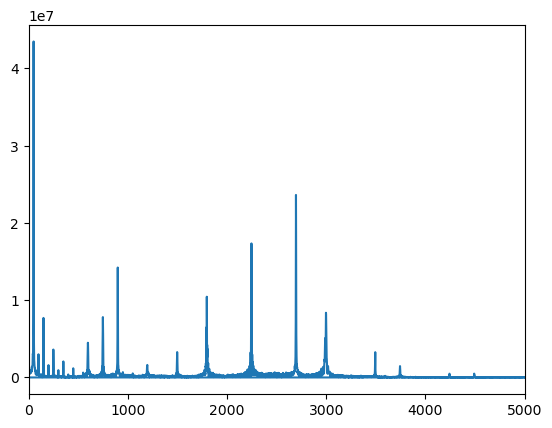

In [15]:
import wave
import numpy as np
import matplotlib.pyplot as plt
 
file_name = "output.wav" # 録音ファイル
RATE = 48000 # 録音時に設定したRATE
CHUNK = 1024 * 8 # 録音時に設定したCHUNK
RECORD_SECONDS = 1 # 検出に使いたい秒数
pnts = int(RATE / CHUNK * RECORD_SECONDS) * CHUNK # dataが何点になるかを計算

start = 50000 # ここをいろいろ変えてみる

wf = wave.open(file_name, "rb")
data = np.frombuffer(wf.readframes(wf.getnframes()), dtype='int16')
wf.close()

data = data[start:start+pnts]
fft_data = np.abs(np.fft.fft(data))    #FFTした信号の強度
freqList = np.fft.fftfreq(data.shape[0], d=1.0/RATE)    #周波数（グラフの横軸）の取得
plt.plot(freqList, fft_data)
plt.xlim(0, 5000)    #0～5000Hzまでとりあえず表示する
plt.show()


In [24]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
file_name = "output.wav" # 録音ファイル
RATE = 48000 # 録音時に設定したRATE
CHUNK = 1024 * 8 # 録音時に設定したCHUNK
RECORD_SECONDS = 1 # 検出に使いたい秒数
pnts = int(RATE / CHUNK * RECORD_SECONDS) * CHUNK # dataが何点になるかを計算

start = 50000 # ここをいろいろ変えてみる

wf = wave.open(file_name, "rb")
data = np.frombuffer(wf.readframes(wf.getnframes()), dtype='int16')
wf.close()

data = data[start:start+pnts]
fft_data = np.abs(np.fft.fft(data))
freqList = np.fft.fftfreq(data.shape[0], d=1.0/RATE)

df = pd.DataFrame(dict(freq = freqList, amp = fft_data))
df = df[df['freq']>850] # 850 Hz以下は無視する。
df = df[df['amp']>10000000] # 10000000以上の強度を持つ点を覚える。
print(list(df.index))
# [766, 767, 1533, 1915, 1916, 1917, 1918, 1919, 2299, 2300, 2301]
print(list(df['freq']))
# [897.65625, 898.828125, 1796.484375, 2244.140625, 2245.3125, 2246.484375, 2247.65625, 2248.828125, 2694.140625, 2695.3125, 2696.484375]
print(len(df))
# 11


[766, 767, 1533, 1915, 1916, 1917, 1918, 1919, 2299, 2300, 2301]
[897.65625, 898.828125, 1796.484375, 2244.140625, 2245.3125, 2246.484375, 2247.65625, 2248.828125, 2694.140625, 2695.3125, 2696.484375]
11


In [25]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
file_name = "output.wav" # 録音ファイル
RATE = 48000 # 録音時に設定したRATE
CHUNK = 1024 * 8 # 録音時に設定したCHUNK
RECORD_SECONDS = 1 # 検出に使いたい秒数
pnts = int(RATE / CHUNK * RECORD_SECONDS) * CHUNK # dataが何点になるかを計算

# ここに先ほどの結果を入れる
freq_indices = [766, 767, 1533, 1915, 1916, 1917, 1918, 1919, 2299, 2300, 2301]
15

start = 50000 # ここをいろいろ変えてみる

wf = wave.open(file_name, "rb")
data = np.frombuffer(wf.readframes(wf.getnframes()), dtype='int16')
wf.close()

data = data[start:start+pnts]
fft_data = np.abs(np.fft.fft(data))    #FFTした信号の強度

amp = 0
for i in freq_indices:
    amp += fft_data[i]

print('{:.2e}'.format(amp))
# 8.88e+06


1.71e+08
